<center><H1> Text Mining Assignment - Sentiment Analysis  </H1></center><br/>
<center><H1> Student ID: 2021AIML064 </H1></center><br/>
<center><H1> Student Name:Jagadish Yalla </H1></center><br/>

Sentiment Analysis Using Naive Bayes

This dataset is a collection of articles about Covid-19 published online from May 2020 to September 2020 and stored as a CSV file. The primary providers of these articles are 10news.com, cnn.com, and foxla.com. The dataset contains two columns (text and sentiment). The text column contains text from the articles to which a label applies. The sentiment column contains either the value 1 (positive class) for text with positive sentiment or the value 0 (negative class) for text with negative sentiment.


You might use some of the References given below:

 https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html (Links to an external site.)           
 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html (Links to an external site.)      
 https://towardsdatascience.com/ml-pipelines-with-grid-search-in-scikit-learn-2539d6b53cfb

**Steps to be performed are as follows:**

 

1) Import required libraries - 1 Mark

2) Read dataset and perform Text processing for the tweets ( Remove Stop words , special characters and convert the text to lowercase etc. ) - 2 Mark

3) Using the train_test_split function of Sklearn, Split train and test dataset - 1 Mark

4) Create pipeline and define parameters for GridSearch ( You might Refer the code below ) - 1 Mark

text_clf = Pipeline([('vect', CountVectorizer())      
                          ('tfidf', TfidfTransformer()),     
                         ('clf', MultinomialNB())])     

tuned_parameters = {   
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],   
    'tfidf__use_idf': (True, False),   
    'tfidf__norm': ('l1', 'l2'),   
    'clf__alpha': [1, 1e-1, 1e-2]  
}    
  
5) Perform classification (using GridSearch) - 2 Mark

6) Print the confusion matrix, accuracy, F1 score on the test dataset - 2 Mark

7) Comment about the classification metric values you have obtained in part 6 - 1 mark

8) Try a different set of hyperparameters (defined in tuned_parameters) and comment on its effect on resultant classification metrics. - 2 mark

## 1) Import required libraries - 1 Mark

In [1]:
import nltk
import pandas as pd
import re
import seaborn as sns
import string
import warnings

from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.pipeline import Pipeline

pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")


# 2) Read dataset and perform Text processing for the tweets ( Remove Stop words , special characters and convert the text to lowercase etc. ) - 2 Mark

In [2]:
# Let's read the input dataset/text
df = pd.read_csv("covid-19_articles_data.csv")

In [3]:
df.head()

,Unnamed: 0,text,sentiment
0,0,"If you've recently heard from an old friend, you're not alone. A communication studies professor says he's not surprised that people are looking to reconnect with others they were once close to. “This is an utter reshuffling of people's social lives, in a way that's very, very dramatic and probably different than anything we've ever seen before,” said Dr. Jeffrey Hall, Professor of Communication Studies at the University of Kansas. Dr. Hall has been working with colleagues to collect data on how people are getting social needs met while in quarantine. One thing they've found so far is that taking the initiative to reach out can improve mental health. Dr. Hall has also been exploring why we don't normally keep in touch, even though it's easier than ever with technology. He says we typically get enough social interaction just through casual conversations with others, like at work or in your neighborhood. However, that's changed. “We don't have that,” said Dr. Hall. “So, what that means is we basically have a huge gap of people who we would normally make sense of the world with, and that's being replaced by either the people who are in our households, or people who we have, prior to, not seen very often.",1
1,1,"Dr. Hall says it makes sense that we would reach out to people we've had strong ties to. That's because if it has to be through phone calls or texts, we'd rather connect with someone we really want to talk to. Maintaining a rekindled friendship comes down to making a habit of it, in whatever your new normal routine may be. That could be as simple as making plans to talk once a month. Oklahoma State linebacker Amen Ogbongbemiga announced he has tested positive for COVID-19 after attending a protest rally in Tulsa. After attending a protest in Tulsa AND being well protective of myself, I have tested positive for COVID-19. Please, if you are going to protest, take care of yourself and stay safe. — Amen Ogbongbemiga (@closedprayer) June 3, 2020 Recent Stories from 10news. com PLAY Top Videos San Diego businesses trying to survive the purple tier Video Settings Auto Full Screen About Connatix V78152 Watch More Watch More Watch More Watch More Watch More Watch More 1 min. story Skip 1/1 SPONSORED Visit Advertiser website GO TO PAGE / Coming Next Skip Ad In a tweet sent out on Tuesday night, the redshirt senior also wrote that he was protective of himself while attending the protest.",1
2,2,"""Please, if you are going to protest, take care of yourself and stay safe,"" Ogbongbemiga said. Before the news, the Cowboys released a safe return plan for it's football student-athletes and indicted what would happen if a player tested positive for COVID-19: If a student-athlete, coach or support staff member tests positive for COVID-19, they will enter the quarantine protocol per medical, local/state health department and university guidelines and will begin to receive the appropriate monitoring and treatment from the team physician, athletic training staff and any other medical consultants. The positive student-athlete will be moved to separate housing designated by OSU for quarantine purposes. Appropriate contact tracing as per local/state health department and university guidelines will begin and all that have been in contact will be instructed to quarantine and have symptoms monitored for a period determined by health and medical officials. Contact tracing will begin with the student-athlete’s cohort/workout group. After the determined quarantine time, if the traced contact group is not showing symptoms, they will be retested for COVID-19 prior to resuming activities. Upon receiving a negative test, they will await specific instructions from the team physician and/or the athletic training staff regarding a return to activities. Upon recognition of symptomatic student-athletes and/or staff in the west end zone facility, the person will immediately be referred and directed to OSU University Health Servic

In [4]:
## keep Required columns only
df = df [ [ "text", "sentiment"] ]

In [5]:
df.head()

,text,sentiment
0,"If you've recently heard from an old friend, you're not alone. A communication studies professor says he's not surprised that people are looking to reconnect with others they were once close to. “This is an utter reshuffling of people's social lives, in a way that's very, very dramatic and probably different than anything we've ever seen before,” said Dr. Jeffrey Hall, Professor of Communication Studies at the University of Kansas. Dr. Hall has been working with colleagues to collect data on how people are getting social needs met while in quarantine. One thing they've found so far is that taking the initiative to reach out can improve mental health. Dr. Hall has also been exploring why we don't normally keep in touch, even though it's easier than ever with technology. He says we typically get enough social interaction just through casual conversations with others, like at work or in your neighborhood. However, that's changed. “We don't have that,” said Dr. Hall. “So, what that means is we basically have a huge gap of people who we would normally make sense of the world with, and that's being replaced by either the people who are in our households, or people who we have, prior to, not seen very often.",1
1,"Dr. Hall says it makes sense that we would reach out to people we've had strong ties to. That's because if it has to be through phone calls or texts, we'd rather connect with someone we really want to talk to. Maintaining a rekindled friendship comes down to making a habit of it, in whatever your new normal routine may be. That could be as simple as making plans to talk once a month. Oklahoma State linebacker Amen Ogbongbemiga announced he has tested positive for COVID-19 after attending a protest rally in Tulsa. After attending a protest in Tulsa AND being well protective of myself, I have tested positive for COVID-19. Please, if you are going to protest, take care of yourself and stay safe. — Amen Ogbongbemiga (@closedprayer) June 3, 2020 Recent Stories from 10news. com PLAY Top Videos San Diego businesses trying to survive the purple tier Video Settings Auto Full Screen About Connatix V78152 Watch More Watch More Watch More Watch More Watch More Watch More 1 min. story Skip 1/1 SPONSORED Visit Advertiser website GO TO PAGE / Coming Next Skip Ad In a tweet sent out on Tuesday night, the redshirt senior also wrote that he was protective of himself while attending the protest.",1
2,"""Please, if you are going to protest, take care of yourself and stay safe,"" Ogbongbemiga said. Before the news, the Cowboys released a safe return plan for it's football student-athletes and indicted what would happen if a player tested positive for COVID-19: If a student-athlete, coach or support staff member tests positive for COVID-19, they will enter the quarantine protocol per medical, local/state health department and university guidelines and will begin to receive the appropriate monitoring and treatment from the team physician, athletic training staff and any other medical consultants. The positive student-athlete will be moved to separate housing designated by OSU for quarantine purposes. Appropriate contact tracing as per local/state health department and university guidelines will begin and all that have been in contact will be instructed to quarantine and have symptoms monitored for a period determined by health and medical officials. Contact tracing will begin with the student-athlete’s cohort/workout group. After the determined quarantine time, if the traced contact group is not showing symptoms, they will be retested for COVID-19 prior to resuming activities. Upon receiving a negative test, they will await specific instructions from the team physician and/or the athletic training staff regarding a return to activities. Upon recognition of symptomatic student-athletes and/or staff in the west end zone facility, the person will immediately be referred and directed to OSU University Health Services (or Stillwater

In [6]:
df.shape

(33324, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33324 entries, 0 to 33323
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       33324 non-null  object
 1   sentiment  33324 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 520.8+ KB


In [8]:
# inspect the sentiment column to see how many unique values are there
df.sentiment.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

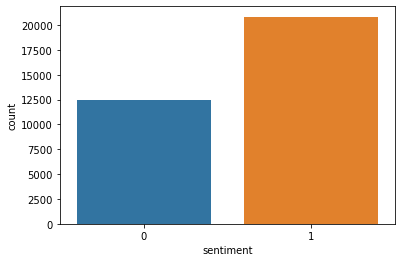

In [9]:
# We see 2 unique values for the sentiments
# Let's see how the distribution of these sentiments in the data
sns.countplot(x='sentiment', data=df)

In [10]:
# This method removes stop words, special characters and converts to lower case
# also as the input text is a tweet, a lot more items are cleaned-up like:
# URLs, hashtags etc
def preprocess_text(text):
    stoppunc = stopwords.words('english')
    stoppunc += string.punctuation
    text = text.lower()
    text = ' '.join([w for w in word_tokenize(text) if ( w not in stoppunc and w.isalpha() == True )])
    text = re.sub('[^a-zA-Z0-9]+', ' ', text) #remove specail characters
    text = re.sub('^@[\w\d]{4,15}','', text) # remove twitter user name
    text = re.sub('@[^\s]+','', text) # remove twitter user name, in case @ is followed by a space
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) # remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', text) 
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text) # remove words like a1123 etc
    text = re.sub(' +',' ', text) # remove + sign
    text = re.sub(r'(.)\1{2,}', r'\1', text) # remove same characters appearing >2 times continuously
    text = re.sub('#[\w\d]+','',text) # remove hashtags
    text = re.sub(r'[^a-zA-Z0-9\s]','', text, re.I) # remove anything EXCEPT letters and numbers or whitespaces
    text = re.sub(r'\b[a-zA-Z]\b', '', text, re.I) # removes single letters like ' a ' ' b ' surrounded by spaces
    text = re.sub(r'\b\d*\b', '', text) # remove any number surrounded by word boundaries and removes them.
    text = re.sub(r'\b\d.*\b', '', text) # remove words starting in a number, and removes them. There is a LOT of junk like 2n, 2r, 3bc, 3d7, stuff like that.
    text = re.sub(r'\b[a-zA-Z]\d*\b', '', text) # remove words like a12334 and a11111111, b24 etc
    text = re.sub('https', '', text) # remove https 
    text = re.sub('http', '', text) # remove http
    return text.strip()

In [11]:
# apply the method to pre-process the text
df['text'] = df['text'].apply(preprocess_text).to_frame()

In [12]:
# after pre-processing, if there are blank lines, remove them
df = df[df.text != ''] # remove blank lines 

In [13]:
# inspect the final cleaned-up text
df

,text,sentiment
0,recently heard old friend alone communication studies professor says surprised people looking reconnect others close utter reshuffling people social lives way dramatic probably different anything ever seen said jeffrey hall professor communication studies university kansas hall working colleagues collect data people getting social needs met quarantine one thing found far taking initiative reach improve mental health hall also exploring normally keep touch even though easier ever technology says typically get enough social interaction casual conversations others like work neighborhood however changed said hall means basically huge gap people would normally make sense world replaced either people households people prior seen often,1
1,hall says makes sense would reach people strong ties phone calls texts rather connect someone really want talk maintaining rekindled friendship comes making habit whatever new normal routine may could simple making plans talk month oklahoma state linebacker amen ogbongbemiga announced tested positive attending protest rally tulsa attending protest tulsa well protective tested positive please going protest take care stay safe amen ogbongbemiga closedprayer june recent stories com play top videos san diego businesses trying survive purple tier video settings auto full screen connatix watch watch watch watch watch watch min story skip sponsored visit advertiser website go page coming next skip ad tweet sent tuesday night redshirt senior also wrote protective attending protest,1
2,please going protest take care stay safe ogbongbemiga said news cowboys released safe return plan football indicted would happen player tested positive coach support staff member tests positive enter quarantine protocol per medical health department university guidelines begin receive appropriate monitoring treatment team physician athletic training staff medical consultants positive moved separate housing designated osu quarantine purposes appropriate contact tracing per health department university guidelines begin contact instructed quarantine symptoms monitored period determined health medical officials contact tracing begin group determined quarantine time traced contact group showing symptoms retested prior resuming activities upon receiving negative test await specific instructions team physician athletic training staff regarding return activities upon recognition symptomatic staff west end zone facility person immediately referred directed osu university health services stillwater medical center working hours evaluation testing treatment needed transportation university health services stillwater medical center symptomatic provided athletic training staff wearing appropriate personal protective equipment ogbongbemiga finished total tackles five sacks one interception last year cowboys,1
3,tulsa health department sent works following statement tulsa health department contact individual setting deemed risk exposure confirmed positive cases among tulsa county residents virus spreads primarily respiratory droplets among individuals within close personal contact within prolonged period time ten minutes longer anyone concerns risk exposure contact tulsa health department tulsa health department respects exercising right peaceful assembly crowds large gatherings conduit transmission spreading community residents encouraged exercise right gather protest safely includes wearing cloth face covering protect around use hand sanitizer soap water readily available practice social distancing avoid touching face want encourage residents use voice safely today reported additional cases three deaths community bringing cumulative total respectively story originally reported kjrh jacob tobey restaurant owners trying figure going make ends meet look reopen,1
4,industry one hardest hit pandemic looking congress help losses restaurant industry nationwide expected hit billion end month around million restaurant workers furl

## 3) Using the train_test_split function of Sklearn, Split train and test dataset - 1 Mark

In [14]:
# Input feature
x = df['text']

# Target feature
y = df['sentiment']

# Split the training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101, stratify=y)

## 4) Create pipeline and define parameters for GridSearch  - 1 Mark

In [15]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [16]:
grid_search = GridSearchCV(text_clf, tuned_parameters, cv = 5, n_jobs=-1)

## 5) Perform classification (using GridSearch) - 2 Mark

In [17]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [1, 0.1, 0.01],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False),
                         'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]})

In [18]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_tfidf__norm,param_tfidf__use_idf,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.933748,0.259863,1.890568,0.069174,1,l1,True,"(1, 1)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}",0.625125,0.625125,0.625125,0.625050,0.625050,0.625095,0.000037,29
1,43.116128,2.375989,5.625169,0.461960,1,l1,True,"(1, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}",0.625125,0.625125,0.625125,0.625050,0.625050,0.625095,0.000037,29
2,29.592056,0.411043,3.585489,0.127059,1,l1,True,"(2, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (2, 2)}",0.625125,0.625125,0.625125,0.625050,0.625050,0.625095,0.000037,29
3,7.811260,0.107092,1.980469,0.129037,1,l1,False,"(1, 1)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}",0.625125,0.625125,0.625125,0.625050,0.625050,0.625095,0.000037,29
4,34.142062,0.264508,5.051814,0.264632,1,l1,False,"(1, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}",0.625125,0.625125,0.625125,0.625050,0.625050,0.625095,0.000037,29
5,26.845011,0.403288,3.158815,0.127043,1,l1,False,"(2, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (2, 2)}",0.625125,0.625125,0.625125,0.625050,0.625050,0.625095,0.000037,29
6,8.214153,0.198876,2.094750,0.109256,1,l2,True,"(1, 1)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}",0.725545,0.733147,0.720544,0.720888,0.729292,0.725883,0.004857,12
7,40.441532,0.946262,5.938836,0.506805,1,l2,True,"(1, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}",0.634327,0.635927,0.635927,0.634254,0.634454,0.634978,0.000778,20
8,30.338103,1.372338,3.834111,0.201368,1,l2,True,"(2, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (2, 2)}",0.655331,0.656331,0.651130,0.649660,0.655062,0.653503,0.002614,15
9,7.912248,0.639546,1.968686,0.135492,1,l2,False,"(1, 1)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}",0.687137,0.694739,0.690738,0.687275,0.692077,0.690393,0.002904,14


In [19]:
grid_search.best_params_
print("\nThe best parameters are: ", grid_search.best_params_)


The best parameters are:  {'clf__alpha': 0.1, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}


In [20]:
y_pred = grid_search.predict(x_test)

## 6) Print the confusion matrix, accuracy, F1 score on the test dataset - 2 Mark


 Confusion Matrix Graph 



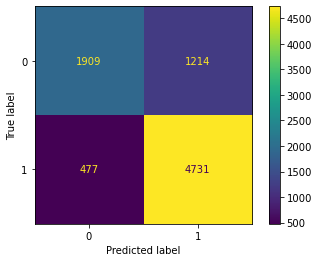

In [21]:
print("\n Confusion Matrix Graph \n")
plot_confusion_matrix(grid_search,x_test, y_test)
plt.show()



In [22]:
print("Accuracy on the test dataset: ",f"{100*accuracy_score(y_test, y_pred):.2f}%")
print("\n================================================================\n")    

print('F1_score on the test dataset: ', f"{100*f1_score(y_test, y_pred, average='weighted'):.2f}%")
print("\n======================================================================\n")


print("\n classification Report \n")
print(classification_report(y_test,y_pred))


Accuracy on the test dataset:  79.70%


F1_score on the test dataset:  79.02%



 classification Report 

              precision    recall  f1-score   support

           0       0.80      0.61      0.69      3123
           1       0.80      0.91      0.85      5208

    accuracy                           0.80      8331
   macro avg       0.80      0.76      0.77      8331
weighted avg       0.80      0.80      0.79      8331



## 7) Comment about the classification metric values you have obtained in part 6 - 1 mark

Comments on Tuned Model
----------------------------------------
 1. Model has  80% accuracy score on 75 % train data.
 2. F1 score is also in the same range which indicates a good model
 3. The best hyperparameters are obtained as'clf__alpha': 0.1, 'tfidf__norm': 'l2', 'tfidf__use_idf': False and 'vect__ngram_range': (1, 1)
 4. Unigrams resulted in good performance on model on parameter tuning.

## 8) Try a different set of hyperparameters (defined in tuned_parameters) and comment on its effect on resultant classification metrics. - 2 mark

In [23]:
## Initializing with new set of paramters for tuning.

In [24]:
text_clf_new = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters_new = {
    'vect__ngram_range': [ (3, 3), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-2]
}

In [25]:
grid_search_new = GridSearchCV(text_clf_new, tuned_parameters_new, cv = 5, n_jobs=-1)

In [26]:
grid_search_new.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [1, 0.01], 'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False),
                         'vect__ngram_range': [(3, 3), (2, 2)]})

In [27]:
pd.DataFrame(grid_search_new.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_tfidf__norm,param_tfidf__use_idf,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,51.686651,5.655975,4.284911,0.595397,1,l1,True,"(3, 3)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (3, 3)}",0.625125,0.625125,0.625125,0.625050,0.625050,0.625095,0.000037,13
1,33.896358,2.141904,4.059751,0.163310,1,l1,True,"(2, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (2, 2)}",0.625125,0.625125,0.625125,0.625050,0.625050,0.625095,0.000037,13
2,40.402139,2.827380,2.824391,0.290032,1,l1,False,"(3, 3)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (3, 3)}",0.625125,0.625125,0.625125,0.625050,0.625050,0.625095,0.000037,13
3,27.397831,0.506545,3.368623,0.169006,1,l1,False,"(2, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (2, 2)}",0.625125,0.625125,0.625125,0.625050,0.625050,0.625095,0.000037,13
4,42.379420,0.480559,3.247830,0.234802,1,l2,True,"(3, 3)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (3, 3)}",0.645529,0.649730,0.645729,0.643057,0.645858,0.645981,0.002139,10
5,31.365871,1.257887,3.620374,0.194138,1,l2,True,"(2, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (2, 2)}",0.655331,0.656331,0.651130,0.649660,0.655062,0.653503,0.002614,7
6,36.366365,0.622457,2.798078,0.105122,1,l2,False,"(3, 3)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (3, 3)}",0.647129,0.649130,0.647329,0.644858,0.648459,0.647381,0.001460,9
7,28.664581,0.290010,3.278174,0.113624,1,l2,False,"(2, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (2, 2)}",0.652130,0.654931,0.647730,0.647659,0.651661,0.650822,0.002788,8
8,41.302421,1.477133,3.520614,0.513513,0.01,l1,True,"(3, 3)","{'clf__alpha': 0.01, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (3, 3)}",0.660532,0.666933,0.656531,0.660664,0.665666,0.662065,0.003784,5
9,31.280933,2.020715,3.890452,0.449278,0.01,l1,True,"(2, 2)","{'clf__alpha': 0.01, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (2, 2)}",0.640528,0.642128,0.638928,0.638856,0.639856,0.640059,0.001206,11


In [28]:
grid_search_new.best_params_
print("\nThe best parameters are: ", grid_search_new.best_params_)


The best parameters are:  {'clf__alpha': 0.01, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (2, 2)}


In [29]:
y_pred_new = grid_search_new.predict(x_test)


 Confusion Matrix Graph 



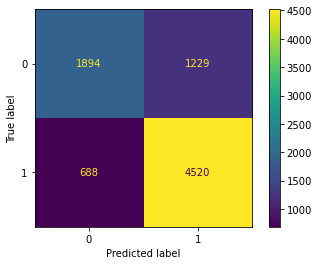

In [30]:
print("\n Confusion Matrix Graph \n")
plot_confusion_matrix(grid_search_new,x_test, y_test)
plt.show()




In [31]:
print("Accuracy on the test dataset: ",f"{100*accuracy_score(y_test, y_pred_new):.2f}%")
print("\n================================================================\n")

print('F1_score on the test dataset: ', f"{100*f1_score(y_test, y_pred_new, average='weighted'):.2f}%")
print("\n======================================================================\n")


print("\n classification Report \n")
print(classification_report(y_test,y_pred_new))

Accuracy on the test dataset:  76.99%


F1_score on the test dataset:  76.47%



 classification Report 

              precision    recall  f1-score   support

           0       0.73      0.61      0.66      3123
           1       0.79      0.87      0.83      5208

    accuracy                           0.77      8331
   macro avg       0.76      0.74      0.74      8331
weighted avg       0.77      0.77      0.76      8331



Comments on model obtained from different set of hyperparamters:
---------------------------------------------------------------------------------------------------
1.Here the bigram model is chosen by gridsearch resulting best performance with below parameters               
   The best parameters are:  {'clf__alpha': 0.01, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (2, 2)}     
2.However, bigram model not performing well when compared to unigram model.                  
3. Accuracy and F1 score is dropped to 77% when coampred to first model. 

**Hence we prefer the unigram model for beter performance**